In [227]:
import pandas as pd
from sklearn import linear_model, neighbors, svm, tree, gaussian_process
import shap
import numpy as np
from sklearn.cross_validation import train_test_split
import seaborn as sns
from sklearn.feature_selection import RFE
import time
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [133]:
def print_accuracy(f):
    print("Accuracy = {0}%".format(100*np.sum(f(X_test) == y_test)/len(y_test)))
    time.sleep(0.5) # to let the print get out before any progress bars

def gen_kfold(modelCV, X_train, y_train):
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    scoring = 'accuracy'
    results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
    print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

def gen_confusion(model, X_test): 
    y_pred = model.predict(X_test)
    print('Accuracy of ' + model.__class__.__name__ + 'classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))
    from sklearn.metrics import confusion_matrix
    confusion_matrix = confusion_matrix(y_test, y_pred)
    print(confusion_matrix)

In [40]:
main = pd.read_csv('data.csv')

In [22]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
logistic = linear_model.LogisticRegression()

In [48]:
main = main.drop("Unnamed: 32", axis=1)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [42]:
main['diagnosis'].unique()

array([1, 0])

In [41]:
main.ix[main.diagnosis == 'M', 'diagnosis'] = 1
main.ix[main.diagnosis == 'B', 'diagnosis'] = 0

/Users/BekkBlando/Documents/github/wisconsin_data/.direnv/python-3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [67]:
final_cols = main.columns.values.tolist()
y = ['diagnosis']
exclude = ['diagnosis', 'id']
X = [col for col in final_cols if col not in exclude]

In [68]:
rfe = RFE(logistic, 18)
rfe = rfe.fit(main[X], main[y] )
col_order = rfe.support_

/Users/BekkBlando/Documents/github/wisconsin_data/.direnv/python-3.6.5/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [71]:
cols = [col for index, col in enumerate(X) if col_order[index]]

In [72]:
X = main[cols]
y = main['diagnosis']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn import metrics
logreg = linear_model.LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [130]:
gen_confusion(logreg, X_test)
gen_kfold(linear_model.LogisticRegression(), X_train, y_train)

Accuracy of LogisticRegressionclassifier on test set: 0.94
[[101   7]
 [  4  59]]
10-fold cross validation average accuracy: 0.947


In [124]:
# Time for K Means
knn = neighbors.KNeighborsClassifier()
knn.fit(X_train, y_train)

print_accuracy(knn.predict)

gen_confusion(knn, X_test)
gen_kfold(neighbors.KNeighborsClassifier(), X_train, y_train)

Accuracy = 95.32163742690058%
Accuracy of KNeighborsClassifierclassifier on test set: 0.95
[[103   5]
 [  3  60]]
10-fold cross validation average accuracy: 0.932


In [134]:
# SVM Time - Radial Kernal
svc_radial = svm.SVC(kernel='rbf', probability=True)
svc_radial.fit(X_train, y_train)
print_accuracy(svc_radial.predict)

gen_confusion(svc_radial, X_test)
gen_kfold(svm.SVC(kernel='rbf', probability=True), X_train, y_train)

# TODO Generate these graphs
# shap_values = shap.KernelExplainer(svc_radial.predict_proba, X_train).shap_values(X_test)
# shap.force_plot(shap_values[0], X_test)

Accuracy = 90.64327485380117%
Accuracy of SVCclassifier on test set: 0.91
[[93 15]
 [ 1 62]]
10-fold cross validation average accuracy: 0.876


In [135]:
# SVM Time - Sigmoid Kernal
svc_sigmoid = svm.SVC(kernel='sigmoid', probability=True)
svc_sigmoid.fit(X_train, y_train)
print_accuracy(svc_sigmoid.predict)

gen_confusion(svc_sigmoid, X_test)
gen_kfold(svm.SVC(kernel='sigmoid', probability=True), X_train, y_train)

# TODO Generate these graphs
# shap_values = shap.KernelExplainer(svc_sigmoid.predict_proba, X_train).shap_values(X_test)
# shap.force_plot(shap_values[0], X_test)

Accuracy = 63.1578947368421%
Accuracy of SVCclassifier on test set: 0.63
[[108   0]
 [ 63   0]]
10-fold cross validation average accuracy: 0.625


In [137]:
# SVM Time - Polynomial Kernal
svc_poly = svm.SVC(kernel='poly', probability=True)
svc_poly.fit(X_train, y_train)
print_accuracy(svc_poly.predict)

gen_confusion(svc_poly, X_test)
gen_kfold(svm.SVC(kernel='poly', probability=True), X_train, y_train)

# TODO Generate these graphs
# shap_values = shap.KernelExplainer(svc_linear.predict_proba, X_train).shap_values(X_test)
# shap.force_plot(shap_values[0], X_test)

Accuracy = 92.98245614035088%
Accuracy of SVCclassifier on test set: 0.93
[[98 10]
 [ 2 61]]
10-fold cross validation average accuracy: 0.947


In [138]:
# SVM Time - Linear Kernal
svc_linear = svm.SVC(kernel='linear', probability=True)
svc_linear.fit(X_train, y_train)
print_accuracy(svc_linear.predict)


gen_confusion(svc_linear, X_test)
gen_kfold(svm.SVC(kernel='linear', probability=True), X_train, y_train)

# TODO Generate these graphs
# shap_values = shap.KernelExplainer(svc_linear.predict_proba, X_train).shap_values(X_test)
# shap.force_plot(shap_values[0], X_test)

Accuracy = 95.90643274853801%
Accuracy of SVCclassifier on test set: 0.96
[[102   6]
 [  1  62]]
10-fold cross validation average accuracy: 0.945


In [139]:
# Random Forest Time
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0)
rforest.fit(X_train, y_train)
print_accuracy(rforest.predict)

gen_confusion(rforest, X_test)
gen_kfold(RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0), X_train, y_train)

# TODO Generate these graphs
# shap_values = shap.KernelExplainer(rforest.predict_proba, X_train).shap_values(X_test)
# shap.force_plot(shap_values[0], X_test)

Accuracy = 94.73684210526316%
Accuracy of RandomForestClassifierclassifier on test set: 0.95
[[103   5]
 [  4  59]]
10-fold cross validation average accuracy: 0.947


In [140]:
# Decision Tree Time
dtree = tree.DecisionTreeClassifier(min_samples_split=2)
dtree.fit(X_train, y_train)
print_accuracy(dtree.predict)

gen_confusion(dtree, X_test)
gen_kfold(tree.DecisionTreeClassifier(min_samples_split=2), X_train, y_train)


# TODO Generate these graphs
# shap_values = shap.KernelExplainer(dtree.predict_proba, X_train).shap_values(X_test)
# shap.force_plot(shap_values[0], X_test)

Accuracy = 92.39766081871345%
Accuracy of DecisionTreeClassifierclassifier on test set: 0.92
[[98 10]
 [ 3 60]]
10-fold cross validation average accuracy: 0.917


In [141]:
# Simple Neural Net
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs', alpha=1e-1, hidden_layer_sizes=(5, 2), random_state=0)
nn.fit(X_train, y_train)
print_accuracy(nn.predict)

gen_confusion(nn, X_test)
gen_kfold(MLPClassifier(solver='lbfgs', alpha=1e-1, hidden_layer_sizes=(5, 2), random_state=0), X_train, y_train)

# explain all the predictions in the test set
# shap_values = shap.KernelExplainer(nn.predict_proba, X_train).shap_values(X_test)
# shap.force_plot(shap_values[0], X_test)

Accuracy = 92.98245614035088%
Accuracy of MLPClassifierclassifier on test set: 0.93
[[99  9]
 [ 3 60]]
10-fold cross validation average accuracy: 0.947


In [184]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print_accuracy(gnb.predict)

gen_confusion(gnb, X_test)
gen_kfold(GaussianNB(), X_train, y_train)
# shap_values = shap.KernelExplainer(gnb.predict_proba, X_train).shap_values(X_test)
# shap.force_plot(shap_values[0], X_test)

Accuracy = 91.2280701754386%
Accuracy of GaussianNBclassifier on test set: 0.91
[[101   7]
 [  8  55]]
10-fold cross validation average accuracy: 0.942


In [162]:
# SGD Classifier
clf = linear_model.SGDClassifier(max_iter=30, tol=1e-3)
clf.fit(X_train, y_train)

print_accuracy(clf.predict)

gen_confusion(clf, X_test)
gen_kfold(linear_model.SGDClassifier(max_iter=100, tol=1e-3), X_train, y_train)

Accuracy = 85.38011695906432%
Accuracy of SGDClassifierclassifier on test set: 0.85
[[103   5]
 [ 20  43]]
10-fold cross validation average accuracy: 0.836


In [185]:
# Perceptron
iteration = 10
clf = linear_model.SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None, max_iter=iteration, tol=1e-3)
clf.fit(X_train, y_train)

print_accuracy(clf.predict)

gen_confusion(clf, X_test)
gen_kfold(linear_model.SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None, max_iter=iteration, tol=1e-3), X_train, y_train)


Accuracy = 85.38011695906432%
Accuracy of SGDClassifierclassifier on test set: 0.85
[[94 14]
 [11 52]]
10-fold cross validation average accuracy: 0.769


Computing regularization path using the LARS ...
.

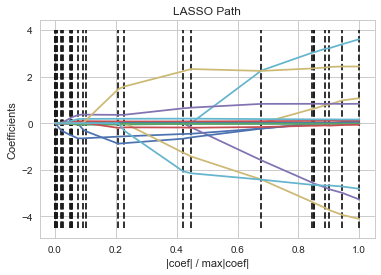

In [193]:

print("Computing regularization path using the LARS ...")
alphas, _, coefs = linear_model.lars_path(X_train.as_matrix(), y_train, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

In [221]:
# Radius Neighbors Classifier
radius = 70
rnc = neighbors.RadiusNeighborsClassifier(radius = radius)
rnc.fit(X_train, y_train)

print_accuracy(rnc.predict)

gen_confusion(rnc, X_test)
gen_kfold(neighbors.RadiusNeighborsClassifier(radius = radius), X_train, y_train)

Accuracy = 82.45614035087719%
Accuracy of RadiusNeighborsClassifierclassifier on test set: 0.82
[[108   0]
 [ 30  33]]
10-fold cross validation average accuracy: 0.834


In [226]:
# Neartest Shrunken Centroid
clf = neighbors.NearestCentroid(shrink_threshold=.1)
clf.fit(X_train, y_train)

print_accuracy(clf.predict)

gen_confusion(clf, X_test)
gen_kfold(neighbors.NearestCentroid(shrink_threshold=.1), X_train, y_train)

Accuracy = 88.30409356725146%
Accuracy of NearestCentroidclassifier on test set: 0.88
[[106   2]
 [ 18  45]]
10-fold cross validation average accuracy: 0.895


In [229]:
# Gaussian Process Classifier - 1.0 * RBF(1.0)
gausc = gaussian_process.GaussianProcessClassifier()
gausc.fit(X_train, y_train)

print_accuracy(gausc.predict)

gen_confusion(gausc, X_test)
gen_kfold(gaussian_process.GaussianProcessClassifier(), X_train, y_train)

Accuracy = 93.5672514619883%
Accuracy of GaussianProcessClassifierclassifier on test set: 0.94
[[100   8]
 [  3  60]]
10-fold cross validation average accuracy: 0.912


In [234]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

print_accuracy(lda.predict)

gen_confusion(lda, X_test)
gen_kfold(LinearDiscriminantAnalysis(), X_train, y_train)

Accuracy = 95.32163742690058%
Accuracy of LinearDiscriminantAnalysisclassifier on test set: 0.95
[[108   0]
 [  8  55]]
10-fold cross validation average accuracy: 0.960


In [245]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
# Extra Trees Classifier
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

print_accuracy(etc.predict)

gen_confusion(etc, X_test)
gen_kfold(ExtraTreesClassifier(), X_train, y_train)

Accuracy = 95.90643274853801%
Accuracy of ExtraTreesClassifierclassifier on test set: 0.96
[[106   2]
 [  5  58]]
10-fold cross validation average accuracy: 0.962


In [242]:
# Extra Trees Classifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

print_accuracy(gbc.predict)

gen_confusion(gbc, X_test)
gen_kfold(GradientBoostingClassifier(), X_train, y_train)

Accuracy = 97.6608187134503%
Accuracy of GradientBoostingClassifierclassifier on test set: 0.98
[[106   2]
 [  2  61]]
10-fold cross validation average accuracy: 0.950


In [243]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# Quadrati Discriminant Analysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

print_accuracy(qda.predict)

gen_confusion(qda, X_test)
gen_kfold(QuadraticDiscriminantAnalysis(), X_train, y_train)

Accuracy = 91.2280701754386%
Accuracy of QuadraticDiscriminantAnalysisclassifier on test set: 0.91
[[100   8]
 [  7  56]]
10-fold cross validation average accuracy: 0.952


In [246]:
# Ada Classifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

print_accuracy(ada.predict)

gen_confusion(ada, X_test)
gen_kfold(AdaBoostClassifier(), X_train, y_train)

Accuracy = 95.90643274853801%
Accuracy of AdaBoostClassifierclassifier on test set: 0.96
[[105   3]
 [  4  59]]
10-fold cross validation average accuracy: 0.972
